In [66]:
# --- Cell 1: Setup
!pip install pandas scikit-learn matplotlib nltk --quiet
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
# --- Cell 2: Load Processed Data
import pandas as pd, pickle, json
df = pd.read_csv("clean_dataset.csv")
tfidf = pickle.load(open("tfidf_vectorizer.pkl","rb"))
idx = json.load(open("indices.json"))
X, y = df['text_join'], df['label']
X_train_vec, X_test_vec = tfidf.transform(X.iloc[idx["train"]]), tfidf.transform(X.iloc[idx["test"]])
y_train, y_test = y.iloc[idx["train"]], y.iloc[idx["test"]]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"\n=== {name} ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

# Create a DataFrame of metrics
metrics_df = pd.DataFrame(results)
metrics_df



=== Logistic Regression ===
Accuracy:  0.9054
Precision: 0.9412
Recall:    0.8649
F1 Score:  0.9014

=== Naive Bayes ===
Accuracy:  0.9054
Precision: 0.8947
Recall:    0.9189
F1 Score:  0.9067

=== Random Forest ===
Accuracy:  0.8108
Precision: 0.9259
Recall:    0.6757
F1 Score:  0.7812

=== Linear SVM ===
Accuracy:  0.9189
Precision: 0.9697
Recall:    0.8649
F1 Score:  0.9143


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.905405,0.941176,0.864865,0.901408
1,Naive Bayes,0.905405,0.894737,0.918919,0.906667
2,Random Forest,0.810811,0.925926,0.675676,0.781250
3,Linear SVM,0.918919,0.969697,0.864865,0.914286


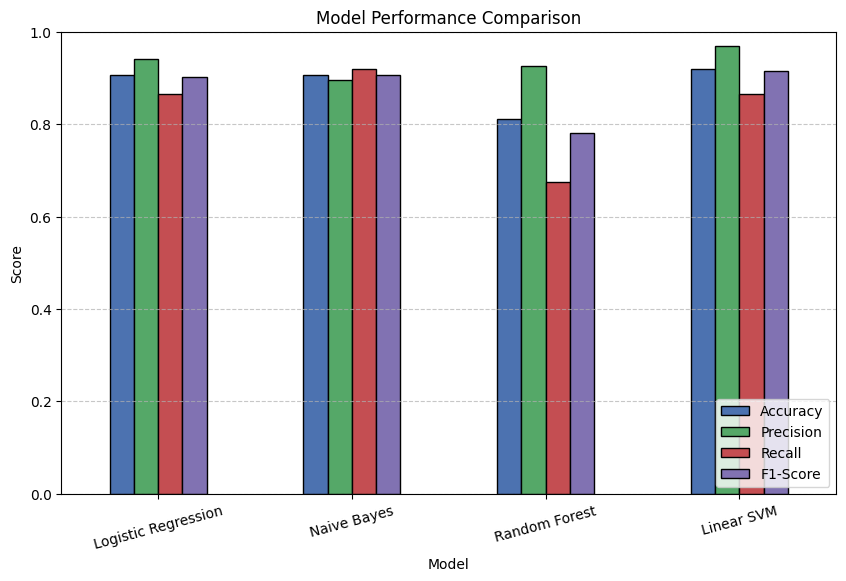

In [69]:
metrics_df.plot(
    x="Model",
    kind="bar",
    figsize=(10,6),
    color=["#4c72b0", "#55a868", "#c44e52", "#8172b2"],
    edgecolor="black"
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.legend(loc="lower right")
plt.show()


In [70]:
# --- Cell 4: Pick Best (SVM)
best_model = models["Linear SVM"]
pickle.dump(best_model, open("model.pkl","wb"))


In [71]:
import numpy as np
model = pickle.load(open("model.pkl","rb"))

def detect_with_percentage(text):
    vec = tfidf.transform([text])
    score = model.decision_function(vec)
    prob = 1/(1+np.exp(-score))
    label = "Plagiarism Detected" if model.predict(vec)[0]==1 else "No Plagiarism"
    percent = float(prob[0])*100
    print(f"{label} ({percent:.2f}% likely plagiarized)")
    return label, percent

paragraph = "The world is rapidly transitioning into an era dominated by intelligent machines and data-driven systems."
detect_with_percentage(paragraph)


Plagiarism Detected (53.04% likely plagiarized)


('Plagiarism Detected', 53.0420703997694)

In [72]:
from google.colab import files

print("Please upload your text file (e.g., input.txt):")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f"\n File '{filename}' uploaded successfully!")

with open(filename, 'r', encoding='utf-8') as f:
    input_text = f.read()

print("\nPreview of file content (first 500 chars):\n")
print(input_text[:500])


Please upload your text file (e.g., input.txt):


Saving input1.rtf to input1 (1).rtf

 File 'input1 (1).rtf' uploaded successfully!

Preview of file content (first 500 chars):

{\rtf1\ansi\ansicpg1252\cocoartf2822
\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\froman\fcharset0 Times-Roman;}
{\colortbl;\red255\green255\blue255;\red0\green0\blue0;}
{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
\paperw11900\paperh16840\margl1440\margr1440\vieww25400\viewh16000\viewkind0
\deftab720
\pard\pardeftab720\sa240\partightenfactor0

\f0\fs24 \cf0 \expnd0\expndtw0\kerning0
\outl0\strokewidth0 \strokec2 Global warming refers to the steady increase in the average temperature of the Earth\'



 Analyzing text...

 Plagiarism Report

Chunk 1 →  Plagiarism Detected (71.22%%)
{\rtf1\ansi\ansicpg1252\cocoartf2822
\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\froman\fcharset0 Times-Roman;}
{\colortbl;\red255\green255\blue255;\red0\green0\blue0;}
{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
\paperw11900\paperh16840\margl1440\margr1440\vieww25400\viewh16000\viewkind0
\deftab720
...

Chunk 2 →  Plagiarism Detected (55.64%%)
The concentration of carbon dioxide in the atmosphere has increased dramatically since the beginning of the Industrial Revolution. Before large-scale industrialization, atmospheric CO\uc0\u8322  levels remained relatively stable for thousands of years. However, with the widespread use of coal, oil, ...

Chunk 3 →  Plagiarism Detected (70.51%%)
Extreme weather events such as hurricanes, floods, and wildfires are becoming more frequent and intense. Changing rainfall patterns are also affecting agriculture, leading to food insecurity in many parts of the world. Marine 

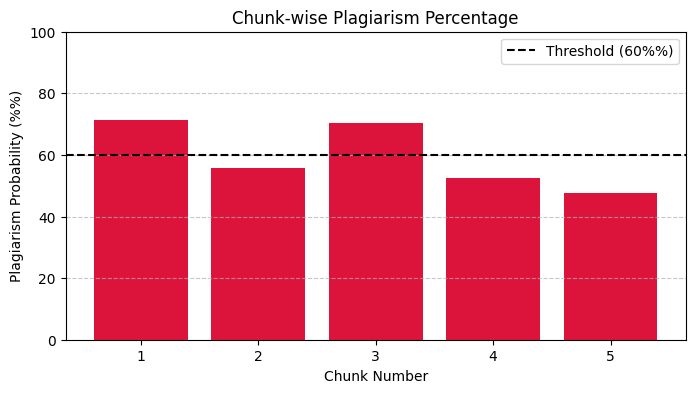


 Detection complete!


In [78]:
def detect_file_plagiarism(text, threshold=60):
    from nltk.tokenize import sent_tokenize
    import numpy as np
    import matplotlib.pyplot as plt

    print("\n Analyzing text...")

    sents = [s.strip() for s in sent_tokenize(text) if s.strip()]
    if not sents:
        print(" No valid text found in file.")
        return

    chunks = [" ".join(sents[i:i+4]) for i in range(0, len(sents), 4)]
    Xv = tfidf.transform(chunks)

    preds = model.predict(Xv)
    try:
        probs = 1 / (1 + np.exp(-model.decision_function(Xv)))
    except:
        probs = np.zeros(len(chunks))

    percentages = (probs * 100).flatten()

    print("\n Plagiarism Report\n" + "="*50)
    for i, (chunk, pred, pc) in enumerate(zip(chunks, preds, percentages)):
        label = " Plagiarism Detected" if pred == 1 else "No Plagiarism"
        print(f"\nChunk {i+1} \u2192 {label} ({pc:.2f}%%)")
        print(chunk[:300] + ("..." if len(chunk) > 300 else ""))

    avg_score = float(np.mean(percentages))
    median_score = float(np.median(percentages))
    plagiarized_ratio = sum(p >= threshold for p in percentages) / len(percentages)

    if (avg_score >= threshold) or (median_score >= threshold) or (plagiarized_ratio >= 0.4):
        verdict = " Plagiarism Detected"
    else:
        verdict = " No Significant Plagiarism"

    print("\n" + "="*50)
    print(f" Average Plagiarism: {avg_score:.2f}%%")
    print(f" Median Plagiarism: {median_score:.2f}%%")
    print(f" Plagiarized Chunks: {plagiarized_ratio*100:.2f}%%")
    print(f" Final Verdict: {verdict}")
    print("="*50)

    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(percentages) + 1), percentages,
            color="crimson" if verdict == " Plagiarism Detected" else "seagreen")
    plt.axhline(y=threshold, color="black", linestyle="--", label=f"Threshold ({threshold}%%)")
    plt.title("Chunk-wise Plagiarism Percentage") # Removed emoji
    plt.xlabel("Chunk Number")
    plt.ylabel("Plagiarism Probability (%%)")
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
detect_file_plagiarism(input_text)

print("\n Detection complete!")